In [2]:
import pandas as pd 
import numpy as np


In [3]:
df = pd.read_csv("clean_df.csv")

In [4]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,1,0,3,1,22.0,1,0,0.014151,0,0,1
1,1,2,1,1,0,38.0,1,0,0.139136,1,0,0
2,2,3,1,3,0,26.0,0,0,0.015469,0,0,1
3,3,4,1,1,0,35.0,1,0,0.103644,0,0,1
4,4,5,0,3,1,35.0,0,0,0.015713,0,0,1


In [5]:
df = df. drop(['PassengerId'],axis=1)

In [6]:
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'C', 'Q', 'S'],
      dtype='object')

In [7]:
df = df. drop(['Unnamed: 0'],axis=1)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,0.014151,0,0,1
1,1,1,0,38.0,1,0,0.139136,1,0,0
2,1,3,0,26.0,0,0,0.015469,0,0,1
3,1,1,0,35.0,1,0,0.103644,0,0,1
4,0,3,1,35.0,0,0,0.015713,0,0,1


In [9]:
df_train = df.drop(['Survived'],axis=1)
target = df['Survived']

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)


C:\Users\arpita.c.gupta\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(pred_y,y_test)
cm

array([[153,  35],
       [ 22,  85]], dtype=int64)

In [13]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Survived','Not Survived'], 
                     columns = ['Survived','Not Survived'])

In [14]:
cm_df

,Survived,Not Survived
Survived,153,35
Not Survived,22,85


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True,fmt="d")
plt.title('Logistic regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_y)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<Figure size 550x400 with 2 Axes>

In [16]:
accuracy = accuracy_score(pred_y,y_test)

In [17]:
accuracy

0.8067796610169492

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, pred_y, average='weighted')

0.8067796610169492

In [19]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_y, average='macro')

0.8041111552992642

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       175
           1       0.79      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.81      0.81      0.80       295



In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_y)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7913095238095239

Text(0.5, 0, 'False Positive Rate')

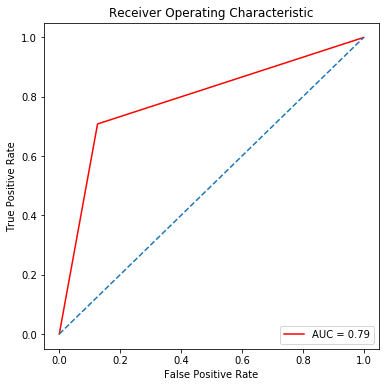

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pred_y)

No handles with labels found to put in legend.


Text(0.5, 0, 'Precision')

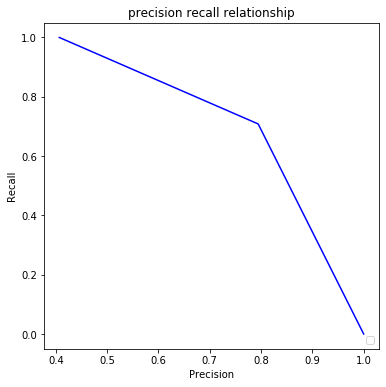

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('precision recall relationship')
plt.plot(precision,recall, color='blue')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('Recall')
plt.xlabel('Precision')